<div style="background-color:#e1f5ff; padding:20px;">
    <h3>CSE3054 Data Mining</h3>
    <h1>Digital Assignment</h1>
    <h4>20BCE0083 - Jeevan Yohan Varghese</h4>
    <p>Slot: E1</p>
</div>

Question Number : (83 mod 24)+1=11+1=12

<b>12. Human Resources</b>

In [9]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('aug_train.csv')


Decision Tree Classifier Accuracy: 0.791178112786153
Naive Bayes Classifier Accuracy: 0.8146286990508096


<div style="background-color:#e1f5ff; padding:4px;margin-bottom:8px;"></div>



<div style="background-color:#e1f5ff; padding:4px;margin-top:8px;display:flex;align-items:center;">
<h2> 1. Prepocessing data</h2></div>

In [ ]:

# Preprocessing
df = df.dropna()  # Remove rows with missing values
df = df.drop(columns=['enrollee_id', 'city', 'last_new_job'])  # Remove irrelevant columns
le = preprocessing.LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Convert categorical variables to numerical
df['relevent_experience'] = le.fit_transform(df['relevent_experience'])
df['enrolled_university'] = le.fit_transform(df['enrolled_university'])
df['education_level'] = le.fit_transform(df['education_level'])
df['major_discipline'] = le.fit_transform(df['major_discipline'])
df['experience'] = le.fit_transform(df['experience'])
df['company_size'] = le.fit_transform(df['company_size'])
df['company_type'] = le.fit_transform(df['company_type'])
X = df.drop(columns=['target'])
y = df['target']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="background-color:#e1f5ff; padding:4px;margin-bottom:8px;"></div>



<div style="background-color:#e1f5ff; padding:4px;margin-top:8px;display:flex;align-items:center;">
<h2> 2. Classification Algorithms</h2></div>

### Decision Tree

In [17]:
# Decision tree classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_predictions = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print('Decision Tree Classifier Accuracy:', dt_accuracy)



Decision Tree Classifier Accuracy: 0.7922948073701842


### Naive Bayes Classifier

In [18]:
# Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_predictions = nb_clf.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print('Naive Bayes Classifier Accuracy:', nb_accuracy)

Naive Bayes Classifier Accuracy: 0.8146286990508096


<b>Confusion Matrix for decision tree classifier</b>

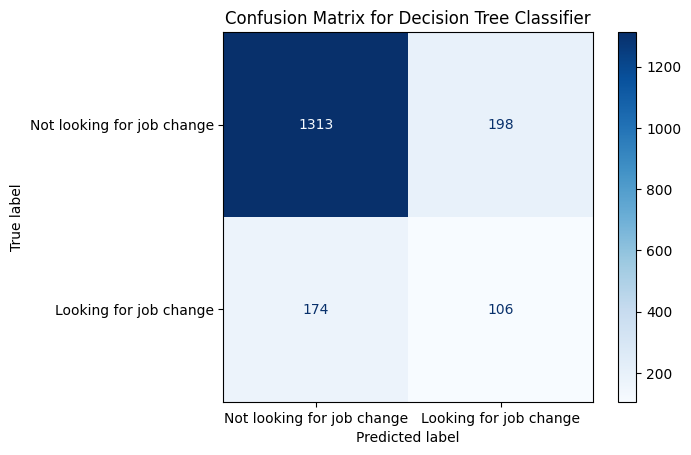

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix for decision tree classifier
y_pred_dt = dt_clf.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Not looking for job change', 'Looking for job change'])
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


<b>Confusion Matrix for Naive Bayes classifier</b>

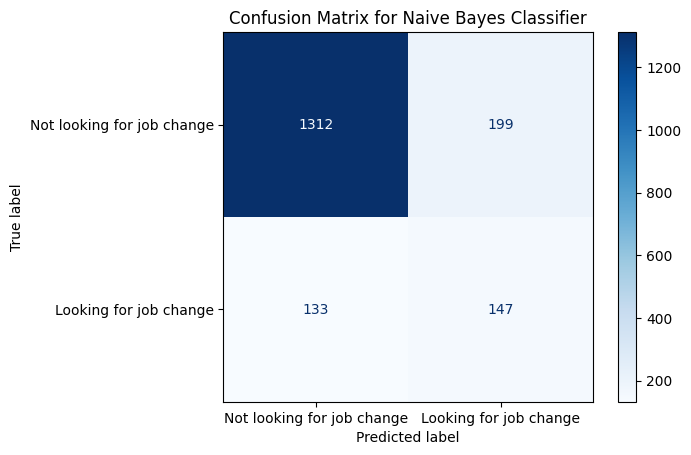

In [20]:

# Confusion matrix for Naive Bayes classifier
y_pred_nb = nb_clf.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Not looking for job change', 'Looking for job change'])
disp_nb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()


<b>Visualising decision tree</b>

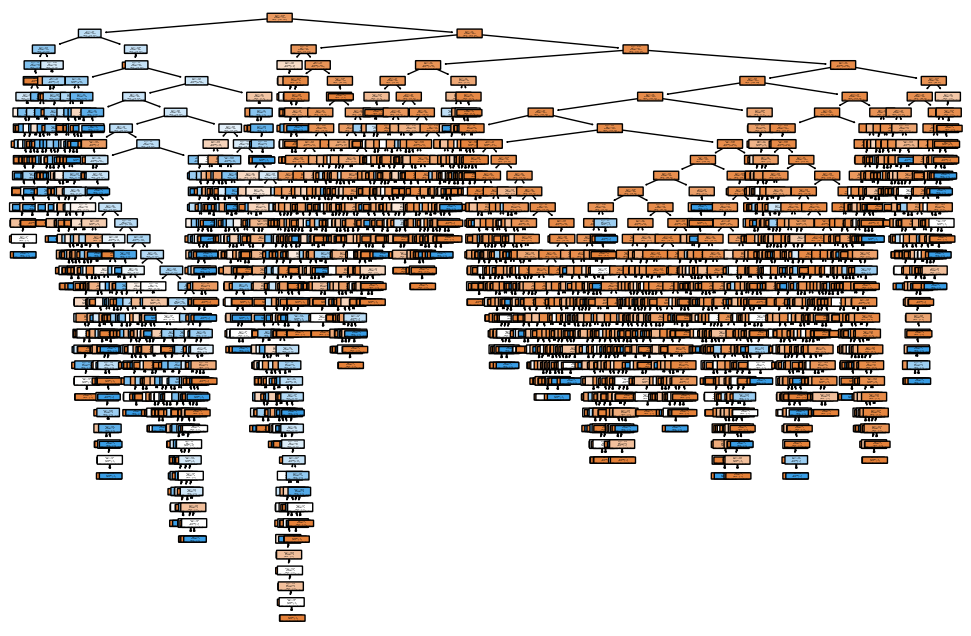

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Decision tree visualization
plt.figure(figsize=(12,8))
plot_tree(dt_clf, filled=True, rounded=True, class_names=['Not looking for job change', 'Looking for job change'])
plt.show()

<div style="background-color:#e1f5ff; padding:4px;margin-bottom:8px;"></div>



<div style="background-color:#e1f5ff; padding:4px;margin-top:8px;display:flex;align-items:center;">
<h2> 3. Clustering Algorithms</h2></div>

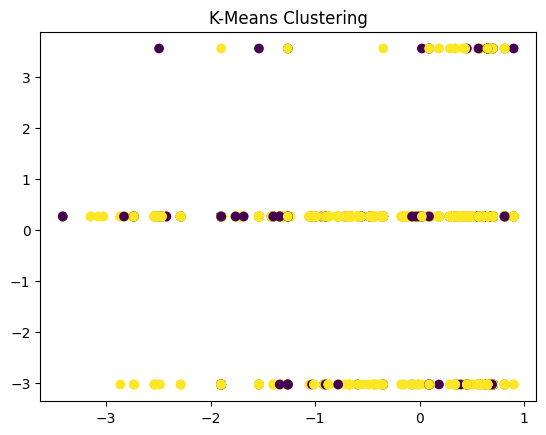

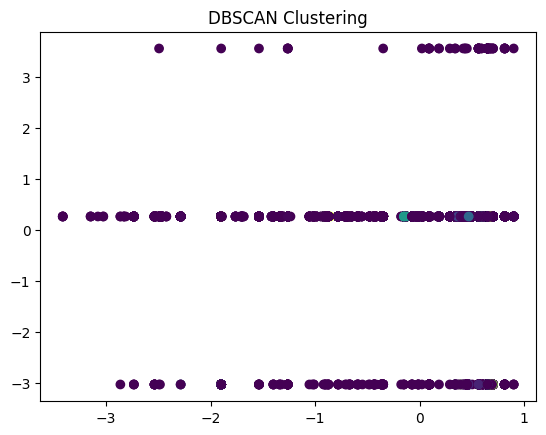

In [15]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42,n_init=10)
kmeans_labels = kmeans.fit_predict(X_std)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_std)

# Visualize the clusters
plt.scatter(X_std[:, 0], X_std[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

plt.scatter(X_std[:, 0], X_std[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

### Hierarchical Clustering

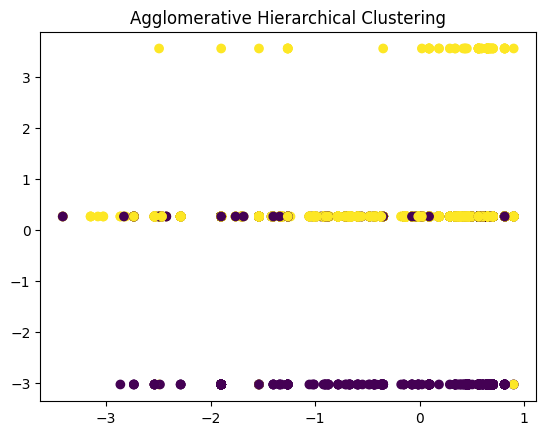

In [16]:
from sklearn.cluster import AgglomerativeClustering

# Perform agglomerative hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_std)

# Visualize the clusters
plt.scatter(X_std[:, 0], X_std[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Hierarchical Clustering')
plt.show()

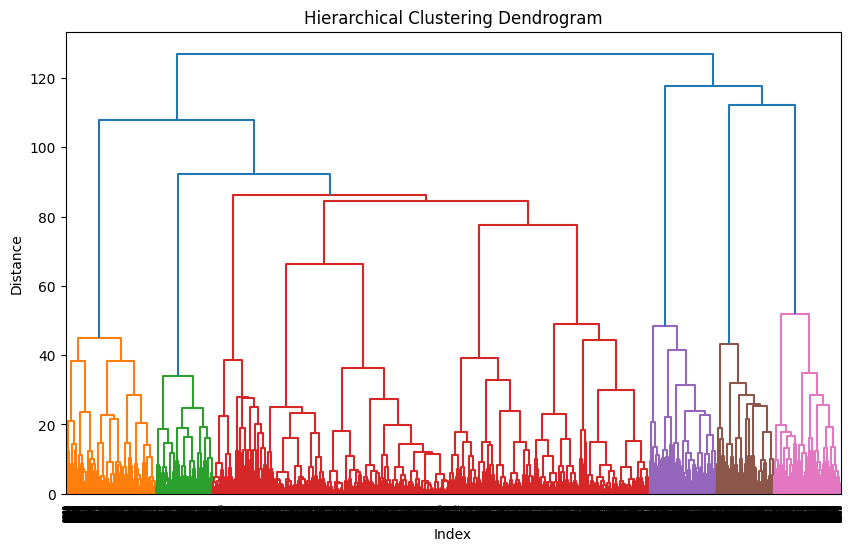

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering
Z = linkage(X_std, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()